# attC sites detect by integron_finder

## Protocol to insert cassette in E.coli genome

![cassette insertion protocol](./cassette_insertion.svg)

## Check cassette injection protocol

In [1]:
from Bio import SeqIO

In [2]:
coli = SeqIO.read('../data/Ecoli-K12-MG1655_ORI_CENTERED.fasta', 'fasta')
plasmid = SeqIO.read('../data/cassette_attCaadA7.fasta', 'fasta')
seq_for = SeqIO.read('../data/Salin_sequences/00000_for_2321053_GTT.fasta', 'fasta')


### injection in forward

In [3]:
pos = 2321053 -1
insert_site = coli[pos -5: pos +6]
start_k7 = plasmid[388: 395]
k7_len=len(plasmid)
seq_junc_upstream = seq_for[pos -5: pos +5]


#### check upstream (in 5')

In [4]:
print(f"Coli     {insert_site.seq}")
print(f"start k7      {start_k7.seq}")
print(f"coli+k7  {seq_junc_upstream.seq}")

Coli     GAATGTTGATC
start k7      TTAGACG
coli+k7  GAATGTTAGA


#### check downstream (in 3')

In [5]:
end_k7 = plasmid[380:388] # 388 excluded but zero based
seq_junc_downstream = seq_for[pos + k7_len - 6: pos + k7_len + 5]

In [6]:
print(f"Coli          {insert_site.seq}")
print(f"end k7      {end_k7.seq}")
print(f"coli+k7       {seq_junc_downstream.seq}")

Coli          GAATGTTGATC
end k7      TTCAAGCG
coli+k7       CAAGCGTTGAT


### injection in reverse

In [7]:
seq_rev = SeqIO.read('../data/Salin_sequences/10231_rev_254_AAC.fasta', 'fasta')

#### check upstream (in 5')

In [8]:
pos = 254 - 1
insert_site = coli[pos -5: pos +6]
ori_to_cut = plasmid[:387 + 1] # 388 included in 1 based => 387 included in zero based
cut_to_end = plasmid[387 + 1:]
k7_for = cut_to_end + ori_to_cut
k7_rev = k7_for.reverse_complement()
start_k7 = k7_rev[:8]
k7_len=len(k7_rev)
seq_junc_upstream = seq_rev[pos -5: pos +7]

In [9]:
print(f"Coli          {insert_site.seq}")
print(f"start k7            {start_k7.seq}")
print(f"coli+k7       {seq_junc_upstream.seq}")

Coli          TAATAACTTCG
start k7            CGCTTGAA
coli+k7       TAATAACGCTTG


#### check downstream (in 3')

In [10]:
end_k7 = k7_rev[-15:]
seq_junc_downstream = seq_rev[pos + k7_len - 6: pos + k7_len + 5]

In [11]:
print(f"Coli               {insert_site.seq}")
print(f"end k7    {end_k7.seq}")
print(f"k7+coli           {seq_junc_downstream.seq}")

Coli               TAATAACTTCG
end k7    AGTGGATCCGTCTAA
k7+coli           CGTCTAACTTC


## check injection

The junctions of generated genome match to what we expected

## Results analysis

In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
def site_plot(data, title=''):
    graph = sns.catplot(data=data, y='site', x='count', kind='bar', orient='h', height=10)
    if title:
        graph.set(title=title)
    ax = graph.ax
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.0f}", (p.get_width(), (p.get_y() + p.get_height() / 2)+.2))

### Number of intgerons found

In [14]:
summary = pd.read_csv("salin_all_seq.summary", sep="\t", comment="#")

In [15]:
summary.head()

ID_replicon  CALIN  complete  In0 topology     size
0  20500_rev_3742260_ATC      0         0    0     circ  4643517
1  02316_for_3247205_GAT      0         0    0     circ  4643517
2  02509_for_3345090_GAT      0         0    0     circ  4643517
3  00349_for_2444562_GAT      0         0    0     circ  4643517
4  01105_for_2742275_GAT      0         0    0     circ  4643517

In [16]:
summary.sort_values(by=['ID_replicon'], ignore_index=True, inplace=True)

In [17]:
summary.head()

ID_replicon  CALIN  complete  In0 topology     size
0  00000_for_2321053_GTT      1         0    0     circ  4643517
1  00001_for_2321364_GTT      1         0    0     circ  4643517
2  00002_for_2321413_GAT      1         0    0     circ  4643517
3  00003_for_2322321_GTT      1         0    0     circ  4643517
4  00004_for_2322650_GTT      1         0    0     circ  4643517

#### number of sequences where integron detect attC sites

In [18]:
calin_nb, complete_nb, In0_nb, *_ = summary.sum(numeric_only=True)

In [19]:
f"{calin_nb=} ({calin_nb / len(summary):.2%}), {complete_nb=} ({complete_nb / len(summary):.2%}), {In0_nb=}({In0_nb / len(summary):.2%}), nb of seq = {len(summary)}"

'calin_nb=16584 (74.46%), complete_nb=0 (0.00%), In0_nb=0(0.00%), nb of seq = 22271'

## conclusion

We do not found complete or In0 integrons as we expected. 

We found 16584 sequences with attc sites which correspond of 74.5 % of the seuences

## looking attc sites

In [20]:
integrons_df = pd.read_csv("salin_all_seq.integrons", sep="\t", comment="#")

In [21]:
integrons_df.head()

ID_integron            ID_replicon                     element  pos_beg  \
0  integron_01   06298_for_779352_GTT                    attc_001   781163   
1  integron_01   06298_for_779352_GTT    06298_for_779352_GTT_750   781173   
2  integron_01   06278_for_768696_GTT                    attc_001   770507   
3  integron_01   06278_for_768696_GTT    06278_for_768696_GTT_739   770517   
4  integron_01  16229_rev_2269159_AAC  16229_rev_2269159_AAC_2139  2268564   

   pos_end  strand        evalue type_elt annotation   model   type default  \
0   781222       1  3.000000e-06     attC       attC  attc_4  CALIN      No   
1   782555      -1           NaN  protein    protein     NaN  CALIN      No   
2   770566       1  1.800000e-07     attC       attC  attc_4  CALIN      No   
3   771836      -1           NaN  protein    protein     NaN  CALIN      No   
4  2269097      -1           NaN  protein    protein     NaN  CALIN      No   

   distance_2attC considered_topology  
0             NaN                circ  
1             NaN                circ  
2             NaN                circ  
3             NaN                circ  
4             NaN                circ

In [22]:
len(integrons_df)

31847

filter integrons to keep only attC elements

In [23]:
attc = integrons_df.loc[integrons_df.type_elt == 'attC']

In [24]:
attc.head()

ID_integron            ID_replicon   element  pos_beg  pos_end  strand  \
0  integron_01   06298_for_779352_GTT  attc_001   781163   781222       1   
2  integron_01   06278_for_768696_GTT  attc_001   770507   770566       1   
5  integron_01  16229_rev_2269159_AAC  attc_001  2269155  2269213      -1   
7  integron_01   11630_rev_715930_TAC  attc_001   715925   715984      -1   
8  integron_01  04236_for_4203981_GTT  attc_001  4205792  4205851       1   

         evalue type_elt annotation   model   type default  distance_2attC  \
0  3.000000e-06     attC       attC  attc_4  CALIN      No             NaN   
2  1.800000e-07     attC       attC  attc_4  CALIN      No             NaN   
5  9.700000e-04     attC       attC  attc_4  CALIN      No             NaN   
7  3.900000e-04     attC       attC  attc_4  CALIN      No             NaN   
8  1.500000e-06     attC       attC  attc_4  CALIN      No             NaN   

  considered_topology  
0                circ  
2                circ  
5                circ  
7                circ  
8                circ

In [25]:
len(attc)

16590

there is more attc sites than sequences
Let's search the sequences with more than one attc

In [26]:
several_attc = attc.loc[attc.duplicated(subset=['ID_replicon'], keep=False)]

In [27]:
several_attc

ID_integron            ID_replicon   element  pos_beg  pos_end  strand  \
991    integron_01  09839_for_2218752_GTT  attc_001  2218654  2218757       1   
993    integron_01  09839_for_2218752_GTT  attc_002  2220563  2220622       1   
2605   integron_01  15359_rev_2013292_ATC  attc_001  2013179  2013346      -1   
2606   integron_01  15359_rev_2013292_ATC  attc_002  2013280  2013346      -1   
4277   integron_01  01203_for_2771519_GTT  attc_001  2771493  2771597       1   
4279   integron_01  01203_for_2771519_GTT  attc_002  2773330  2773389       1   
5024   integron_01  13011_rev_1299872_ATC  attc_001  1299749  1299926      -1   
5025   integron_01  13011_rev_1299872_ATC  attc_002  1299867  1299926      -1   
15345  integron_01  17422_rev_2583400_ATC  attc_001  2583395  2583454      -1   
15348  integron_01  17422_rev_2583400_ATC  attc_002  2585260  2585308      -1   
18343  integron_01  16990_rev_2447410_AAC  attc_001  2447405  2447464      -1   
18346  integron_01  16990_rev_2447410_AAC  attc_002  2449270  2449427      -1   

         evalue type_elt annotation   model   type default  distance_2attC  \
991    0.950000     attC       attC  attc_4  CALIN      No             NaN   
993    0.000002     attC       attC  attc_4  CALIN      No          1806.0   
2605   0.300000     attC       attC  attc_4  CALIN      No             NaN   
2606   0.710000     attC       attC  attc_4  CALIN      No       4643451.0   
4277   0.770000     attC       attC  attc_4  CALIN      No             NaN   
4279   0.000280     attC       attC  attc_4  CALIN      No          1733.0   
5024   0.160000     attC       attC  attc_4  CALIN      No             NaN   
5025   0.900000     attC       attC  attc_4  CALIN      No       4643458.0   
15345  0.023000     attC       attC  attc_4  CALIN      No             NaN   
15348  0.230000     attC       attC  attc_4  CALIN      No          1806.0   
18343  0.005600     attC       attC  attc_4  CALIN      No             NaN   
18346  0.550000     attC       attC  attc_4  CALIN      No          1806.0   

      considered_topology  
991                  circ  
993                  circ  
2605                 circ  
2606                 circ  
4277                 circ  
4279                 circ  
5024                 circ  
5025                 circ  
15345                circ  
15348                circ  
18343                circ  
18346                circ

number of attc per sequences

In [28]:
several_attc.groupby(['ID_replicon']).ID_replicon.count()

ID_replicon
01203_for_2771519_GTT    2
09839_for_2218752_GTT    2
13011_rev_1299872_ATC    2
15359_rev_2013292_ATC    2
16990_rev_2447410_AAC    2
17422_rev_2583400_ATC    2
Name: ID_replicon, dtype: int64

We found 6 sequences with 2 attc sites one corresponding to the injected sites plus an other

### Distance between the insertion and the detected attC site

In [29]:
attc_df = attc.loc[:, ['ID_replicon','element', 'pos_beg', 'pos_end', 'strand']]

In [30]:
attc_df = attc_df.join(attc_df['ID_replicon'].str.split('_', expand=True).rename(columns={0:'ID', 1:'orient', 2:'insert', 3:'site'}))
attc_df = attc_df.astype({'insert':int})

In [31]:
attc_df.head()

ID_replicon   element  pos_beg  pos_end  strand     ID orient  \
0   06298_for_779352_GTT  attc_001   781163   781222       1  06298    for   
2   06278_for_768696_GTT  attc_001   770507   770566       1  06278    for   
5  16229_rev_2269159_AAC  attc_001  2269155  2269213      -1  16229    rev   
7   11630_rev_715930_TAC  attc_001   715925   715984      -1  11630    rev   
8  04236_for_4203981_GTT  attc_001  4205792  4205851       1  04236    for   

    insert site  
0   779352  GTT  
2   768696  GTT  
5  2269159  AAC  
7   715930  TAC  
8  4203981  GTT

#### For the forward inserts

In [32]:
forw = attc_df.loc[attc_df.orient == 'for']

In [33]:
forw.head()

ID_replicon   element  pos_beg  pos_end  strand     ID orient  \
0    06298_for_779352_GTT  attc_001   781163   781222       1  06298    for   
2    06278_for_768696_GTT  attc_001   770507   770566       1  06278    for   
8   04236_for_4203981_GTT  attc_001  4205792  4205851       1  04236    for   
10  03881_for_4021575_GTT  attc_001  4023386  4023445       1  03881    for   
12  00303_for_2418538_GTT  attc_001  2420349  2420408       1  00303    for   

     insert site  
0    779352  GTT  
2    768696  GTT  
8   4203981  GTT  
10  4021575  GTT  
12  2418538  GTT

In [34]:
len(forw)

7574

In [35]:
forw_dist = forw['insert'] - forw['pos_beg']
forw_dist

0       -1811
2       -1811
8       -1811
10      -1811
12      -1811
         ... 
31828   -1811
31830   -1811
31832   -1811
31836   -1811
31840   -1811
Length: 7574, dtype: int64

In [36]:
forw_dist.value_counts()


-1811    7572
 98         1
 26         1
dtype: int64

In [37]:
forw.loc[forw_dist != -1811]

ID_replicon   element  pos_beg  pos_end  strand     ID orient  \
991   09839_for_2218752_GTT  attc_001  2218654  2218757       1  09839    for   
4277  01203_for_2771519_GTT  attc_001  2771493  2771597       1  01203    for   

       insert site  
991   2218752  GTT  
4277  2771519  GTT

This 2 sequences have 2 attC sites

So for all other sequences where we insert the cassette in forward,

Integron_finder find an attc site of **1811 nt** after the insertion point.

#### For the reverse inserts

In [38]:
rev = attc_df.loc[attc_df.orient == 'rev']
rev

ID_replicon   element  pos_beg  pos_end  strand     ID  \
5      16229_rev_2269159_AAC  attc_001  2269155  2269213      -1  16229   
7       11630_rev_715930_TAC  attc_001   715925   715984      -1  11630   
9      15015_rev_1932462_ATC  attc_001  1932457  1932516      -1  15015   
17     17268_rev_2528924_CTT  attc_001  2528921  2528978      -1  17268   
19     14650_rev_1827081_AAC  attc_001  1827076  1827135      -1  14650   
...                      ...       ...      ...      ...     ...    ...   
31835  16562_rev_2351197_ATC  attc_001  2351192  2351251      -1  16562   
31839  16854_rev_2414293_ATC  attc_001  2414290  2414347      -1  16854   
31842   11876_rev_839381_ATC  attc_001   839376   839435      -1  11876   
31844  20582_rev_3784078_AGC  attc_001  3784073  3784132      -1  20582   
31846  19043_rev_3109830_AAC  attc_001  3109825  3109884      -1  19043   

      orient   insert site  
5        rev  2269159  AAC  
7        rev   715930  TAC  
9        rev  1932462  ATC  
17       rev  2528924  CTT  
19       rev  1827081  AAC  
...      ...      ...  ...  
31835    rev  2351197  ATC  
31839    rev  2414293  ATC  
31842    rev   839381  ATC  
31844    rev  3784078  AGC  
31846    rev  3109830  AAC  

[9016 rows x 9 columns]

In [39]:
rev_dist = rev['insert'] - rev['pos_beg']
rev_dist

5        4
7        5
9        5
17       3
19       5
        ..
31835    5
31839    3
31842    5
31844    5
31846    5
Length: 9016, dtype: int64

In [40]:
rev_dist_count = rev_dist.value_counts()

rev_dist_count = rev_dist_count.to_frame().reset_index()
rev_dist_count.columns= ['dist', 'count']
rev_dist_count.sort_values(by=['dist'], inplace=True)
rev_dist_count

dist  count
14 -1860      3
8      1     27
7      2     30
3      3    409
2      4    648
0      5   6428
1      6    767
4      7    227
5      8    213
6      9    137
9     10     27
11    11     19
10    12     20
12    13     12
13    14      5
36    15      1
19    16      2
24    17      2
31    18      1
23    19      2
35    23      1
26    32      1
22    39      2
27    40      1
25    41      1
48    42      1
38    45      1
33    47      1
40    49      1
16    50      2
43    51      1
34    53      1
15    56      2
39    57      1
28    70      1
29    71      1
18    74      2
20    80      2
42    84      1
37    86      1
17    87      2
21    92      2
30   104      1
41   105      1
46   113      1
32   119      1
47   123      1
45   138      1
44   139      1

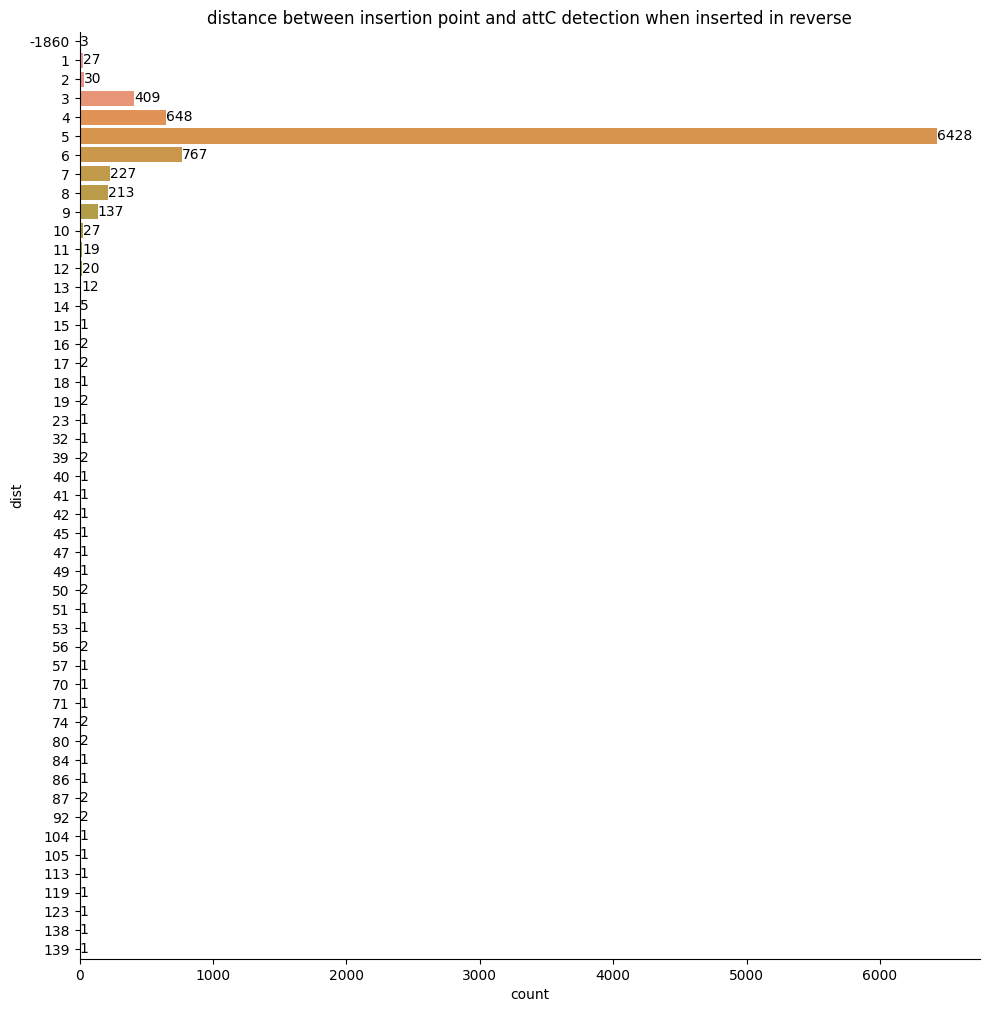

In [41]:
title = "distance between insertion point and attC detection when inserted in reverse"
graph = sns.catplot(data=rev_dist_count, y='dist', x='count', kind='bar', orient='h', height=10)
if title:
    graph.set(title=title)
ax = graph.ax
for p in ax.patches:
    ax.annotate(f"{p.get_width():.0f}", (p.get_width(), (p.get_y() + p.get_height() / 2)+.2))